In [15]:
import keras
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers import Activation
from keras.layers import Dropout

import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import sys
import argparse
import preprocess

In [17]:
# Creating dictionary of labels
class_labels = {str(x):x for x in range(10)}
class_labels.update({'+':10, 'times':11, '-':12 })
label_class = dict( zip(class_labels.values(), class_labels.keys() ))

# Loading data from .npy file and spliting into training and validation sets
path = './Training Data/'
ver = '1'
path1 = path+'data_ver'+ver+'.npy'
path2 = path+'labels_ver'+ver+'.npy'
data, labels = preprocess.load_data(class_labels, path1 , path2, train = 0.9 , val = 0.1)

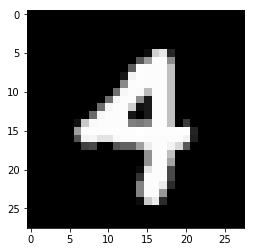

Label =  4


In [8]:
idx = np.random.randint(data['train'].shape[0])
plt.imshow(data['train'][idx,:].reshape(28,28),cmap = 'gray')
plt.show()
print('Label = ',label_class[ np.argmax(labels['train'][idx,:])])

In [30]:
img_x, img_y = 28, 28
x_train = data['train'].reshape(data['train'].shape[0], img_x, img_y, 1)
y_train = labels['train']
x_test = data['val'].reshape(data['val'].shape[0], img_x, img_y, 1)
y_test = labels['val']
input_shape = (img_x, img_y, 1)

# convert the data to the right type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
num_classes = y_train.shape[1]

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1),input_shape=input_shape))
model.add(BatchNormalization())
model.add( keras.layers.LeakyReLU(alpha=0.1)  )
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add( keras.layers.LeakyReLU(alpha=0.1)  )
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(1000 ))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Dense(256 ))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Dense(num_classes, activation='softmax'))

adam1 = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=adam1,metrics=['accuracy'] )
history = model.fit(x_train, y_train, epochs=20, batch_size=256,validation_split=0.1,
                   validation_data=(x_test, y_test))

# serialize model to JSON
model_json = model.to_json()
with open("./trained models/CNN_ver{0}.1.json".format(ver), "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("./trained models/CNN_ver{0}.1.h5".format(ver))
print("Saved model to disk")



Train on 19543 samples, validate on 2171 samples
Epoch 1/20
19543/19543 [==============================] - 87s 4ms/step - loss: 0.2162 - acc: 0.9390 - val_loss: 5.3566 - val_acc: 0.1059
Epoch 2/20
19543/19543 [==============================] - 93s 5ms/step - loss: 0.0450 - acc: 0.9872 - val_loss: 6.3307 - val_acc: 0.1059
Epoch 3/20
19543/19543 [==============================] - 90s 5ms/step - loss: 0.0256 - acc: 0.9945 - val_loss: 6.9749 - val_acc: 0.1059
Epoch 4/20
19543/19543 [==============================] - 85s 4ms/step - loss: 0.0144 - acc: 0.9968 - val_loss: 6.5080 - val_acc: 0.1059
Epoch 5/20
19543/19543 [==============================] - 77s 4ms/step - loss: 0.0095 - acc: 0.9985 - val_loss: 4.6511 - val_acc: 0.2133
Epoch 6/20
19543/19543 [==============================] - 85s 4ms/step - loss: 0.0070 - acc: 0.9987 - val_loss: 2.1331 - val_acc: 0.4638
Epoch 7/20
19543/19543 [==============================] - 85s 4ms/step - loss: 0.0069 - acc: 0.9988 - val_loss: 0.6706 - val_acc:

  CNN Ver1 results test accuracy = 

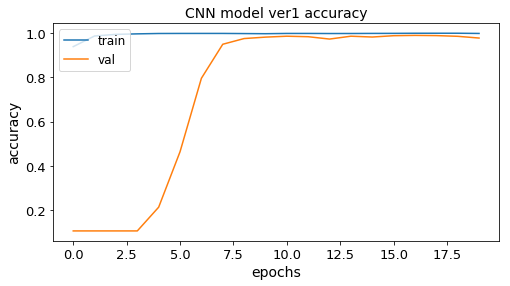

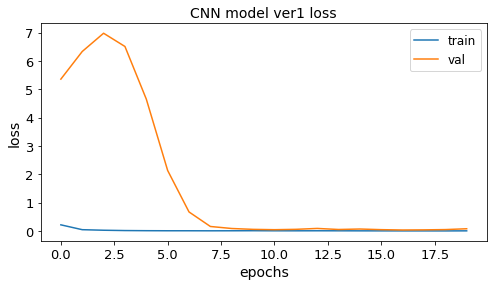

In [31]:
# summarize history for accuracy
plt.figure(figsize=(8,4))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('CNN model ver{0} accuracy'.format(ver),fontsize = 14)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.ylabel('accuracy',fontsize = 14)
plt.xlabel('epochs',fontsize = 14)
plt.legend(['train', 'val'], loc='upper left',fontsize = 12)
plt.show()

# summarize history for loss
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN model ver{0} loss'.format(ver),fontsize = 14)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.ylabel('loss',fontsize = 14)
plt.xlabel('epochs',fontsize = 14)
plt.legend(['train', 'val'], loc='upper right', fontsize = 12)
plt.show()
